# Fashion MNIST - Categorical Classification
> ## Convolutional Neural Network

## Import Keras

In [1]:
import keras
keras.__version__

'2.4.3'

# 1. Fashion MNIST Data_Set Load & Review

> ## 1) Load Fashion MNIST Data_Set

In [6]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

- Train_Data Information

In [7]:
print(len(X_train))
print(X_train.shape) # 이미지 6만장이 28 x 28의 일정한 크기로 구성되어 있다

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


- Test_Data Information

In [8]:
print(len(X_test))
print(X_test.shape) # 이미지 1만장이 28 x 28의 일정한 크기로 구성되어 있다


print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


# 2. Data Preprocessing

> ## 1) Reshape and Normalization

- reshape

In [10]:
X_train = X_train.reshape((60000, 28, 28, 1)) # 2차원
X_test = X_test.reshape((10000, 28, 28, 1)) 

- Normalization

In [11]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [12]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3. MNIST Keras Modeling

> ## 1) Model Define

- Feature Extraction Layer : Convolution Layer 쌓기

In [13]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1))) 
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


- Classification Layer

In [15]:
# CNN 뒤에 DNN 붙어서 분류 
model.add(layers.Flatten()) 
model.add(layers.Dense(units = 64, activation = 'relu')) # 576 * 64 + 64
model.add(layers.Dense(units = 10, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

> ## 2) Model Compile

- 모델 학습방법 설정

In [28]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
# 0 ~ 9를 분류해야 하니까 다중분류_CEE

> ## 3) EarlyStopping( )

In [29]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

> ## 4) ModelCheckpoint( )

In [19]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_fashion_mnist.h5',
                     monitor = 'val_loss',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 5) Model Fit with callbacks

- 약 2분

In [20]:
%%time

hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2,
                       callbacks = [es, mc],
                       verbose = 1)

Epoch 1/100
375/375 [==============================] - 33s 5ms/step - loss: 0.9100 - accuracy: 0.6634 - val_loss: 0.5031 - val_accuracy: 0.8102

Epoch 00001: val_loss improved from inf to 0.50309, saving model to best_fashion_mnist.h5
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4157 - accuracy: 0.8456 - val_loss: 0.4009 - val_accuracy: 0.8502

Epoch 00002: val_loss improved from 0.50309 to 0.40092, saving model to best_fashion_mnist.h5
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3447 - accuracy: 0.8748 - val_loss: 0.3258 - val_accuracy: 0.8805

Epoch 00003: val_loss improved from 0.40092 to 0.32585, saving model to best_fashion_mnist.h5
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2977 - accuracy: 0.8908 - val_loss: 0.3448 - val_accuracy: 0.8706

Epoch 00004: val_loss did not improve from 0.32585
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2636 - accuracy: 

> ## 6) 학습 결과 시각화 

- Loss Visualization

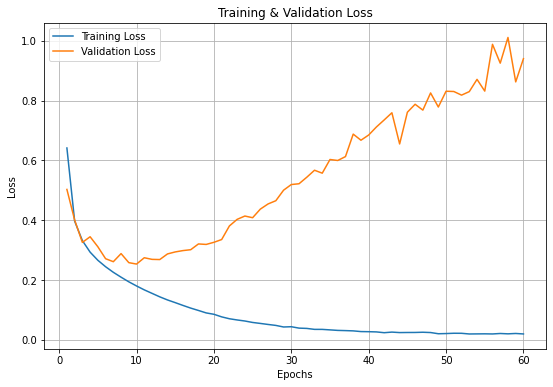

In [21]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 7) Model Evaluate

- Loss & Accuracy

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# test data에서 Accuracy = 0.90520이지만, 
#  Loss 또한 높다. 

313/313 [==============================] - 1s 2ms/step - loss: 1.0330 - accuracy: 0.9052
Loss = 1.03304
Accuracy = 0.90520


# 4. MNIST Keras Modeling with Dropout, BatchNormalization

In [23]:
from keras import backend as K
K.clear_session()

> ## 1) Model Define & Compile

In [26]:
# CNN
from keras import models
from keras import layers

model = models.Sequential(name = 'EarlyStopping')
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1))) 
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

# CNN 뒤에 DNN 붙어서 분류 
model.add(layers.Flatten()) 
model.add(layers.Dense(units = 64, activation = 'relu')) # 576 * 64 + 64
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = 10, activation = 'softmax'))

In [27]:
model.summary()

Model: "EarlyStopping"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)              

> ## 2) Model Compile

- 모델 학습방법 설정

> ## 3) EarlyStopping( )

> ## 4) ModelCheckpoint( )

In [30]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_fashion_mnist_BN&Drop.h5',
                     monitor = 'val_loss',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 5) Model Fit with callbacks

- 약 2분

In [31]:
%%time

hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2,
                       callbacks = [es, mc],
                       verbose = 1)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.8241 - accuracy: 0.7164 - val_loss: 0.5804 - val_accuracy: 0.8488

Epoch 00001: val_loss improved from inf to 0.58036, saving model to best_fashion_mnist_BN&Drop.h5
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4080 - accuracy: 0.8582 - val_loss: 0.4633 - val_accuracy: 0.8388

Epoch 00002: val_loss improved from 0.58036 to 0.46332, saving model to best_fashion_mnist_BN&Drop.h5
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3510 - accuracy: 0.8785 - val_loss: 0.3597 - val_accuracy: 0.8680

Epoch 00003: val_loss improved from 0.46332 to 0.35968, saving model to best_fashion_mnist_BN&Drop.h5
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3005 - accuracy: 0.8960 - val_loss: 0.2783 - val_accuracy: 0.8999

Epoch 00004: val_loss improved from 0.35968 to 0.27827, saving model to best_fashion_mnist_BN&Drop.h5
Epoch 5/100
375/375 

> ## 6) 학습 결과 시각화 

- Loss Visualization

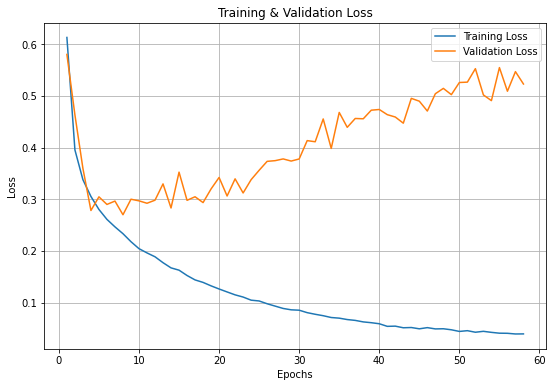

In [32]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 7) Model Evaluate

- Loss & Accuracy

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# test data에서 Accuracy = 0.90520 -> 0.90480으로 떨어졌지만, 
# Loss = 1.03304 -> 0.56102로 또한 떨어졌다. 

313/313 [==============================] - 1s 2ms/step - loss: 0.5610 - accuracy: 0.9048
Loss = 0.56102
Accuracy = 0.90480


# 5. 결론

- 같은 데이터셋으로 DNN을 진행했을 때 전반적으로 좋았던 BN + Dropout 적용 모델 : Accuracy = 0.8868, Loss = 0.462093 
<br><br>
- CNN으로 했을 때, BN + Dropout 적용 모델 :  
Accuracy = 0.90480, Loss = 0.56102
<br><br>
- 모델 성능은 CNN을 적용했을 때 더 좋고, 오차는 더 높은 것을 알 수 있다.